In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
styles = ["../polya.mplstyle"]

work = "200721"
encoding = "utf-16"
columns = ["Time", "Signal"] # Time is in minutes
flowrate = 0.2 # mL/min.

In [2]:
data_dir = Path("../data/sec")
samples = {
    "200721":["L","P","R","LR","PR","LP","LPR"],
    "200722":["C", "LPR", "LPRC"],
}[work]

labels = {
    'L': "LARP1 (L)",
    'P': "PABPC1 (P)",
    'R': "A25 (R)",
    'LR': "L+R",
    'PR': "P+R",
    'LP': "L+P",
#     'LPR': "L+P+R",
    'LPR': "LARP1-PABPC1-A25 (LPR)",
    'C': "CCR4-CAF1 (C)",
    'LPRC': "LPR+C"
}

labels = [labels[smp] for smp in samples]

readouts = ["260", "280"]

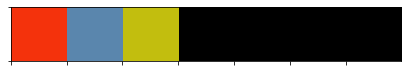

In [3]:
## Color settings

colors = dict(zip( ["L", "P", "R"], sns.xkcd_palette(["vermillion", "dusty blue", "puke yellow"])))
sns.palplot([colors.get(smp, 'black') for smp in samples])

Reference 260/280 ratio  
protein: 0.57  
RNA: 2.0

Multiple subplots

L
P
R
LR
PR
LP
LPR


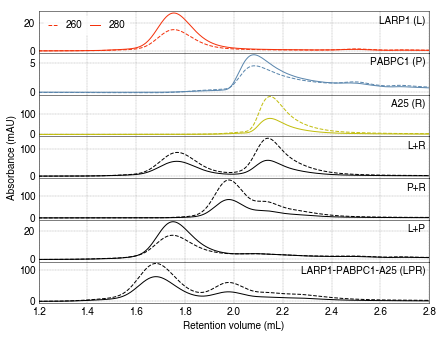

In [4]:
### Multiple subplots for every sample
savefig = False
minifig = True
figsize = [14, 2 + 1.25 * len(samples)]
   
linestyles = dict(zip(readouts, ["--","-",":"]))
pri_ro = 280 # primary readout for pinpointing the peak

if minifig:
    styles.append("../mini.mplstyle")
    figsize = list(map(lambda x:x/2, figsize))

with plt.style.context(styles):
    fig, axes = plt.subplots(nrows=len(samples), sharex=True, sharey=False, figsize=figsize,
                             gridspec_kw={'hspace': 0, 'wspace': 0})
    for si, smp in enumerate(samples):
        ax = axes[si]
        for ro in readouts: 
            fpath = data_dir/work/(smp+str(ro)+".CSV")
            df = pd.read_csv(fpath, sep='\t', header=None, names=columns, encoding=encoding)
            df["Volume"] = df["Time"] * flowrate

            ls = linestyles[ro]
            ax.plot(df["Volume"], df["Signal"], color=colors.get(smp, 'black'), ls=ls, label=ro)

#         ax.set_ylim([0,130])
        ax.text(x=0.99, y=0.7, s=labels[si], transform=ax.transAxes, ha="right")
    
        if si == 0: ax.legend(loc="upper left", ncol=len(readouts), columnspacing=0.8)
                
        ax.grid(True)
        print(smp)
    
    plt.xlim([1.2,2.8])
    
    ## Draw a big axes for the common {x,y}label
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Retention volume (mL)")
    plt.ylabel("Absorbance (mAU)")
    fname_adduct=""
    if minifig is True: fname_adduct += "_mini"
    if savefig is True:
        outfigpath = "../plots/size_exclusive_chromatography_{}{}.pdf".format(work, fname_adduct)
        print( outfigpath )
        plt.savefig(outfigpath, bbox_inches="tight", dpi=300)
    plt.show()



Multiple subplots with reference lines

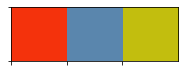

In [5]:
reference_samples = samples[:3]
refsmp_colors = sns.xkcd_palette(["vermillion", "dusty blue", "puke yellow"])
sns.palplot(refsmp_colors)
plt.show()
rc = dict(zip(reference_samples, refsmp_colors))

vmarks = {
    "LR": ["L", "R"],
    "LP": ["L", "P"],
    "PR": ["P", "R"],
    "LPR": ["L", "P", "R"]
}

refpos = {refsmp:None for refsmp in reference_samples} # Assumes all data have the same number of datapoints

In [6]:
import os.path

L
P
R
LR
PR
LP
LPR


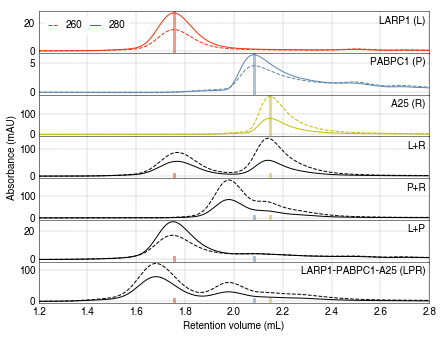

In [7]:
### Multiple subplots for every sample
savefig = False
minifig = True
figsize = [14, 2 + 1.25 * len(samples)]

linestyles = dict(zip(readouts, ["--","-",":"]))
pri_ro = readouts[1] # primary readout for pinpointing the peak positions

if minifig:
    styles.append("../mini.mplstyle")
    figsize = list(map(lambda x:x/2, figsize))

with plt.style.context(styles):
    fig, axes = plt.subplots(nrows=len(samples), sharex=True, sharey=False, figsize=figsize,
                             gridspec_kw={'hspace': 0, 'wspace': 0})
    for si, smp in enumerate(samples):
        ax = axes[si]
        for ro in readouts: 
            fpath = os.path.join(data_dir, work, smp+str(ro)+".CSV")
            df = pd.read_csv(fpath, sep='\t', header=None, names=columns, encoding=encoding)
            df["Volume"] = df["Time"] * flowrate
            
            ls = linestyles[ro]
            if smp in reference_samples:
                ax.plot(df["Volume"], df["Signal"], color=rc[smp], ls=ls, label=ro)
                
                if ro == pri_ro:
                    refpos[smp] = df["Signal"].idxmax()
                    ax.axvline(x=df.loc[refpos[smp], "Volume"], color=rc[smp], lw=3, alpha=0.5)
            
            else: 
                ax.plot(df["Volume"], df["Signal"], color="black", ls=ls, label=ro)
                
                if ro == pri_ro:
                    for vm in vmarks[smp]:
                        ax.axvline(x=df.loc[refpos[vm], "Volume"], ymax=0.1, color=rc[vm], lw=3, alpha=0.5)
                    

#         ax.set_ylim([0,130])
        ax.text(x=0.99, y=0.7, s=labels[si], transform=ax.transAxes, ha="right")
    
        if si == 0: ax.legend(loc="upper left", ncol=len(readouts), columnspacing=0.8)
                
        ax.grid(True)
        print(smp)
    
    plt.xlim(np.array([6,14]) * flowrate)
    
    ## Draw a big axes for the common {x,y}label
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Retention volume (mL)")
    plt.ylabel("Absorbance (mAU)")
    fname_adduct=""
    if minifig is True: fname_adduct += "_mini"
    if savefig is True:
        outfigpath = "../plots/size_exclusive_chromatography_{}_w_vmarks{}.pdf".format(work, fname_adduct)
        print( outfigpath )
        plt.savefig(outfigpath, bbox_inches="tight", dpi=300)
    plt.show()




Separate figures

L


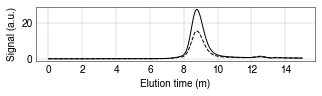

P


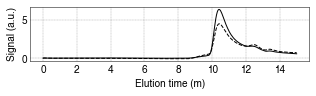

R


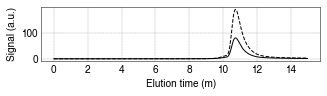

LR


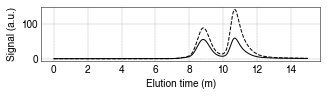

PR


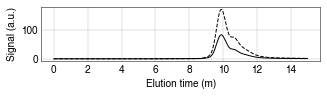

LP


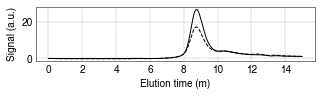

LPR


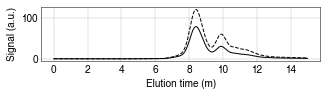

In [8]:
### Assumes there are A280 and A260 measurements
savefig = False
minifig = True
figsize = (10,2.4) if minifig is not True else (5,1)
   
linestyles = dict(zip(readouts, ["--","-",":"]))
pri_ro = 280 # primary readout for pinpointing the peak

if minifig: styles.append("../mini.mplstyle")
with plt.style.context(styles):
    for si, smp in enumerate(samples):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        for ro in readouts: 
            fpath = os.path.join(data_dir, work, smp+str(ro)+".CSV")
            df = pd.read_csv(fpath, sep='\t', header=None, names=columns, encoding=encoding)

            ls = linestyles[ro]
            ax.plot(df["Time"], df["Signal"], color="black", ls=ls)
            
#             if str(ro) == pri_ro:
#             vlines = [df.set_index("Time").idxmax().values[0]]
#             for vline in vlines:
#                 ax.axvline(x=vline, lw=2, color="black", alpha=0.3)
                
#                 # Signal intensity at the peak
#                 vsig = df.set_index("Time").loc[vline].values[0]
#                 ax.text(x=vline*1.02, y=vsig, s="%.3f"%(vsig), va="top")
                
#         ax.text(x=vline, y=ax.get_ylim()[1]*1.07, s="%.3f m"%(vline), ha="center")
                
        ax.grid(True)
#         ax.set_xlim([5,15])
        ax.set_xlabel("Elution time (m)")
        ax.set_ylabel("Signal (a.u.)")
#         ax.text(x=0.99, y=0.8, s=label[smp], ha="right", transform=ax.transAxes)
        print(smp)
        fname_adduct=""
        if minifig is True: fname_adduct += "_mini"
        if savefig is True:
            outfigpath = "../plots/gel_filtration_{}-{}{}.pdf".format(work, smp, fname_adduct)
            print( outfigpath )
            plt.savefig(outfigpath, bbox_inches="tight", dpi=300)
        plt.show()
